# Predicting Regions and the Nomad Score 

In the first assignment you were working with the city and trips data from Nomadlist, exploring city-characteristics, latent grouping and popularity of resulting clusters over time.

In this assignment you are going to work again with the city data, however now you will be exploring supervised learning to predict the Region (aka. continent given city-characteristics) and the Nomad Score.

- The first is a classification problem like in the wine-presentation in class (there are a number of descrete classes and you need to predict which one it is)
- The second is a regression problem where you will have to estimate a continuous value.

Data has been preprocessed for you and you don't have to worry about that. We also imputed missing values and handled outliers.

However, you will have to perform feature scaling (normalization, standardization).

**While the outputs are preserved, many parts of the starter code have been replaced with \*\*\*\* that you have to complete **

You tasks are (Aside from completing this notebook)

- Add min 2 further algorithms (2 for classification, 2 for regression)
- Can you increase the accuracy on the test-set (classification to aroung 90% and regression to R2 ~ 0.55)
- Explain what you observe and what that means. 
- Interpret the results. 
- You may add visualisations if you find it helpful.

In [0]:
# Loading necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Loading the data (we will now load the Data directly from the web)
# If you want you can still use the usual way, downloading the data first

cities_url = 'https://github.com/SDS-AAU/M1-2018/raw/master/assignments/assignment_2/cities_predict.csv'

cities_predict = pd.read_csv(cities_url)

In [3]:
# Checking the variables

cities_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
1br_studio_rent_in_center    730 non-null float64
adult_nightlife              730 non-null float64
air_quality_(year-round)     730 non-null float64
airbnb_(monthly)             730 non-null float64
cashless_society             730 non-null float64
coca-cola                    730 non-null float64
coffee                       730 non-null float64
cost_of_living               730 non-null float64
cost_of_living_for_expat     730 non-null float64
cost_of_living_for_local     730 non-null float64
female_friendly              730 non-null float64
freedom_of_speech            730 non-null float64
friendly_to_foreigners       730 non-null float64
fun                          730 non-null float64
happiness                    730 non-null float64
healthcare                   730 non-null float64
internet                     730 non-null float64
lgbt_friendly                730 non-null flo

In [65]:
# Exploring the data (a bit)

cities_predict.describe()

,1br_studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,cost_of_living_for_local,...,peace,quality_of_life,racial_tolerance,religious_government,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,657.025616,2.106849,40.607051,1708.223126,1.893996,1.338260,2.481932,2.187671,1445.154630,886.850092,...,2.489041,2.887671,2.133738,0.210959,0.475342,2.760274,2.927397,3.473973,3.272603,3.905953
std,474.716605,0.358448,44.043640,947.798240,0.756963,0.869454,1.271214,0.868034,747.402010,513.182398,...,1.011872,0.360591,0.892063,0.408269,0.499734,0.904984,0.678043,0.948615,1.210806,0.432596
min,25.675164,2.000000,1.000000,231.893886,0.404660,0.000000,0.000000,1.000000,272.454326,52.370824,...,1.000000,1.000000,0.342242,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.260000
25%,314.000000,2.000000,16.000000,1095.452999,1.000000,0.580000,1.442500,1.000000,790.978835,476.250000,...,2.000000,3.000000,1.231386,0.000000,0.000000,2.000000,3.000000,3.000000,2.000000,3.630000
50%,554.000000,2.000000,24.000000,1495.000000,2.000000,1.185000,2.405000,2.000000,1302.000000,803.500000,...,3.000000,3.000000,2.000000,0.000000,0.000000,3.000000,3.000000,4.000000,4.000000,3.965000
75%,866.000000,2.000000,50.000000,2105.000000,2.317563,1.940000,3.467500,3.000000,1955.750000,1192.000000,...,3.000000,3.000000,3.000000,0.000000,1.000000,3.000000,3.000000,4.000000,4.000000,4.250000
max,2783.000000,4.000000,368.000000,7839.000000,4.545913,5.000000,8.610000,4.000000,4147.000000,2980.000000,...,4.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.970000


As you can see, all variables but "region", "country" and "place_slug" are already nummerical floats.
Remember that you can select the these  using iloc indexer

**To keep thigns easy and avoid confusion: Please do not use the Nomad Score as an input for any models**

Also, the data is on very different scales (see means and std differences), and thus should be scaled.

In [0]:
# We extract all nummerical values
only_nummerical = cities_predict.iloc[:,:28]

In [0]:
# We extract the regions column (that we want to predict)
region = cities_predict.iloc[:,29]

In [0]:
# We extract the nomad_score column (that we want to predict)
nomad_score = cities_predict.iloc[:,28]

In [69]:
print('### Nummerical values ###')
print(only_nummerical.head(3))

print('### Regions ###')
print(region.head(3))

print('### Nomad Score ###')
print(nomad_score.head(3))

### Nummerical values ###
   1br_studio_rent_in_center  adult_nightlife  air_quality_(year-round)  \
0                      492.0              4.0                      42.0   
1                      223.0              3.0                      19.0   
2                      503.0              2.0                      68.0   

   airbnb_(monthly)  cashless_society  coca-cola  coffee  cost_of_living  \
0             946.0          1.000000       0.70    1.40             3.0   
1             976.0          1.000000       0.63    1.11             3.0   
2            1312.0          1.616589       0.54    0.70             3.0   

   cost_of_living_for_expat  cost_of_living_for_local     ...       nightlife  \
0                     961.0                     626.0     ...             3.0   
1                     697.0                     349.0     ...             3.0   
2                    1064.0                     631.0     ...             2.0   

   peace  quality_of_life  racial_tolerance

Since you are not expected to use the Nomad Score for Region-prediction, we can use the same inputs for the classification and the regression exercise below. Therefore, we can feature-scale it already at this point. Here, for the sake of simplicity we standardize all variables but you may experiment with leaving out dummy variables (0/1).

In [0]:
# We use the standard scaler here but you can experiment with other approaches to that
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_inputs = scaler.fit_transform(*****)

## Classification of regions

In the following you will be using various classification models to predict the region for each city given only the nummerical variables in cities_predict 

In [0]:
X = scaled_inputs

In [0]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

In [0]:
# Define the label encoder to transform region names to numbers
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(*****)

In [0]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(*****, y, test_size = 0.2, random_state = 21)

In [78]:
# We first import and train a Logistic Regression

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(*****, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=21, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print(accuracies.mean())
print(accuracies.std())

0.8300912516927175
0.03549594450837142


In [79]:
# Check the accuracy of the model
classifier.score(X_test, y_test)

0.8493150684931506

In [0]:
# Predicting the test set results from the test-set inputs
y_pred = classifier.predict(*****)

In [84]:
# Transforming nummerical labels back to Region-names

true_regions = labelencoder_y.inverse_transform(y_test)

predicted_regions = labelencoder_y.inverse_transform(*****)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [85]:
# Creating a pandas DataFrame and cross-tabulation

df = pd.DataFrame({'true_regions': true_regions, 'predicted_regions': predicted_regions}) 

pd.crosstab(*****, df.predicted_regions)

predicted_regions,Africa,Asia,Europe,Latin America,Middle East,North America
true_regions,,,,,,
Africa,5,2,0,1,1,0
Asia,0,28,3,1,0,0
Europe,0,3,43,1,0,2
Latin America,0,0,0,21,0,1
Middle East,1,0,0,0,2,0
North America,0,1,1,0,0,25
Oceania,0,0,3,0,0,1


## *Predicting* the Nomad Score
In the following we will try to predict the nomad score (a continuous variable)

In [0]:
# Our inputs are still the same

X = *****

In [0]:
# Our output is the Nomad Score

y = nomad_score

In [0]:
# Splitting the dataset into the Training set and Test set (since we have a new output variable)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, *****, test_size = 0.2, random_state = 21)

In [103]:
# Let's fit a simple linear regression model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(*****, *****)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

k-fold cross-validation is different with regression problems
often you will see people using the r2_score (the more the better) and the RMSE
Root Mean Square Error (the lower the better)
For a regression probme sklearn will perform k-fold cross validation and return the predicted values (for each slice)
Using those and the real values (y_train) you can calculate r2_scores and RMSE

In [126]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
 

predictions = cross_val_predict(estimator = regressor, X = X_train, y = y_train, cv = 10)

# RMSE (np.sqrt stands for quare-root)
print(np.sqrt(mean_squared_error(y_train, predictions)))

# r2_scores
print(r2_score(y_train, predictions))

# Scoring the regressor (r2-score) on the test-set
regressor.score(X_test, y_test)

0.3258601665443509
0.4363039580493796


0.5095913716478288

In [0]:

# Predicting from the held back X_test
y_pred = regressor.predict(*****)

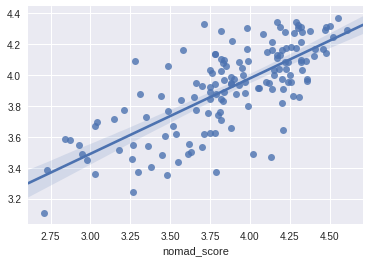

In [124]:
sns.regplot(y_test, y_pred)